## Observations and Insights 

Analysis
There is a strong correlation between mouse weight and tumor volume as indicated in the final linear regression model. 
Capomulin was successful in reducing tumor volume over time. 
Results for the Ceftamin drug were more varied than the other drugs, suggesting potential unreliability.


In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on=["Mouse ID"], how="left")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [91]:
# Checking the number of mice.
mice_count = combine_data.shape[0]
print(mice_count)

deduped_mice_count= combine_data["Mouse ID"].nunique()
print(deduped_mice_count)



1893
249


In [92]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# dupe_mice_count = combined_data[combined_data.duplicated(["Mouse ID"])]
# dupe_mice_count.head()

dupe_mice=combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
dupe_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [93]:
# Optional: Get all the data for the duplicate mouse ID. 

# dupe_mice= combined_data[combined_data.loc[combined_data["Mouse ID"]=="g989"""]
                         

In [94]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

combined_data_drop = combined_data.drop_duplicates(subset="Mouse ID", keep="last")
print(combined_data_drop.shape[0])
combined_data_drop.head()


249


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [95]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = combined_data_drop.shape[0]
print(clean_mice_count)


249


## Summary Statistics

In [96]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_tumor = combined_data_drop.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
median_tumor = combined_data_drop.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
var_tumor = combined_data_drop.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
std_tumor = combined_data_drop.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sem_tumor = combined_data_drop.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

summary = pd.DataFrame({"Mean- Tumor Volume": mean_tumor,
                              "Median- Tumor Volume": median_tumor,
                              "Variance - Tumor Volume": var_tumor,
                              "STD - Tumor Volume" :std_tumor, 
                              "SEM - Tumor Volume" :sem_tumor})


summary


,Mean- Tumor Volume,Median- Tumor Volume,Variance - Tumor Volume,STD - Tumor Volume,SEM - Tumor Volume
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [97]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drug_reg_total = pd.DataFrame(pd.value_counts(combined_data["Drug Regimen"]))
drug_reg_total

,Drug Regimen
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Infubinol,178
Ceftamin,178
Propriva,161


## Bar and Pie Charts

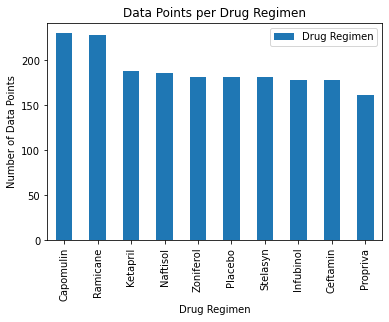

<Figure size 432x288 with 0 Axes>

In [98]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_reg_total.plot(kind="bar")
plt.title("Timepoints per Drug Regimen")
plt.ylabel("Total Timepoints")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

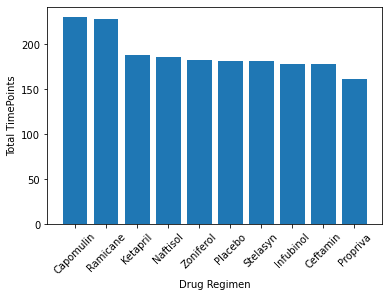

In [110]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = combined_data["Drug Regimen"].value_counts().index
y_axis = combined_data["Drug Regimen"].value_counts()
plt.bar(x_axis, y_axis)
plt.xticks(rotation=45)
plt.ylabel("Total TimePoints")
plt.xlabel("Drug Regimen")
plt.show()


In [100]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

male_v_female = pd.value_counts(combined_data_drop['Sex'])
male_v_female

#still need a pie chart!!!!

Male      125
Female    124
Name: Sex, dtype: int64

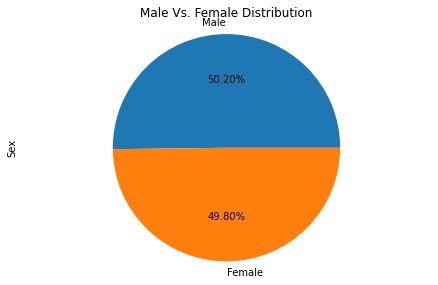

In [101]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
male_v_female_pandas= male_v_female.plot(kind="pie", y="Sex", autopct="%1.2f%%", title="Male Vs. Female Distribution")
male_v_female_pandas.set_ylabel ("Sex")

plt.tight_layout()
plt.axis("equal")
plt.show()



## Quartiles, Outliers and Boxplots

In [111]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Put treatments into a list for for loop (and later for plot labels)

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

    
Capomulin = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Capomulin"]
Ramicane = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Ramicane"]
Infubinol = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Infubinol"]
Ceftamin = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Ceftamin"]
x_axisCa = Capomulin["Tumor Volume (mm3)"]
x_axisR = Ramicane["Tumor Volume (mm3)"]
x_axisI = Infubinol["Tumor Volume (mm3)"]
x_axisCe = Ceftamin["Tumor Volume (mm3)"]

quartiles_Ca = x_axisCa.quantile([.25,.5,.75])
lowerq_Ca = quartiles_Ca[0.25]
upperq_Ca = quartiles_Ca[0.75]
iqr_Ca = upperq_Ca-lowerq_Ca
lower_bound_Ca = lowerq_Ca - (1.5*iqr_Ca)
upper_bound_Ca = upperq_Ca + (1.5*iqr_Ca)
print("Drug: Capomulin")
print(quartiles_Ca)
print(lowerq_Ca)
print(upperq_Ca)
print(iqr_Ca)
print(f"Values below {lower_bound_Ca} are potential outliers.")
print(f"Values above {upper_bound_Ca} are potential outliers.")

quartiles_R = x_axisR.quantile([.25,.5,.75])
lowerq_R = quartiles_R[0.25]
upperq_R = quartiles_R[0.75]
iqr_R = upperq_R-lowerq_R
lower_bound_R = lowerq_R - (1.5*iqr_R)
upper_bound_R = upperq_R + (1.5*iqr_R)
print("Drug: Ramicane")
print(quartiles_R)
print(lowerq_R)
print(upperq_R)
print(iqr_R)
print(f"Values below {lower_bound_R} are potential outliers.")
print(f"Values above {upper_bound_R} are potential outliers.")

quartiles_I = x_axisI.quantile([.25,.5,.75])
lowerq_I = quartiles_I[0.25]
upperq_I = quartiles_I[0.75]
iqr_I = upperq_I-lowerq_I
lower_bound_I = lowerq_I - (1.5*iqr_I)
upper_bound_I = upperq_I + (1.5*iqr_I)
print("Drug: Infubinol")
print(quartiles_I)
print(lowerq_I)
print(upperq_I)
print(iqr_I)
print(f"Values below {lower_bound_I} are potential outliers.")
print(f"Values above {upper_bound_I} are potential outliers.")

quartiles_Ce = x_axisCe.quantile([.25,.5,.75])
lowerq_Ce = quartiles_Ce[0.25]
upperq_Ce = quartiles_Ce[0.75]
iqr_Ce = upperq_Ce-lowerq_Ce
lower_bound_Ce = lowerq_Ce - (1.5*iqr_Ce)
upper_bound_Ce = upperq_Ce + (1.5*iqr_Ce)
print("Drug: Ceftamin")
print(quartiles_Ce)
print(lowerq_Ce)
print(upperq_Ce)
print(iqr_Ce)
print(f"Values below {lower_bound_Ce} are potential outliers.")
print(f"Values above {upper_bound_Ce} are potential outliers.")


Drug: Capomulin
0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
32.37735684
40.1592203
7.781863460000004
Values below 20.70456164999999 are potential outliers.
Values above 51.83201549 are potential outliers.
Drug: Ramicane
0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
31.56046955
40.65900627
9.098536719999998
Values below 17.912664470000003 are potential outliers.
Values above 54.30681135 are potential outliers.
Drug: Infubinol
0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
54.04860769
65.52574285
11.477135160000003
Values below 36.83290494999999 are potential outliers.
Values above 82.74144559000001 are potential outliers.
Drug: Ceftamin
0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
48.72207785
64.29983003
15.577752179999997
Values below 25.355449580000002 are potential outliers.
Values above 8

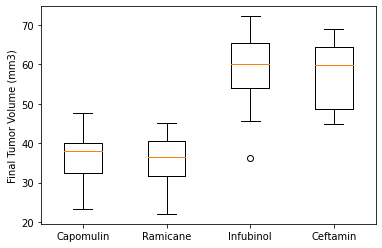

In [104]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot([x_axisCa, x_axisR, x_axisI, x_axisCe])
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

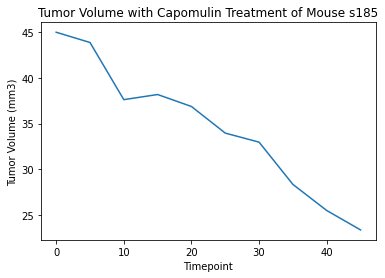

In [105]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_axis = combine_data.loc[combine_data["Mouse ID"] == "s185"]
x_axis = x_axis["Timepoint"]
y_axis = combine_data.loc[combine_data["Mouse ID"] == "s185"]
y_axis = y_axis["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.title("Tumor Volume with Capomulin Treatment of Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

In [106]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_weight_cap = combined_data_drop.loc[combined_data_drop["Drug Regimen"] == "Capomulin"]
mouse_weight_cap

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
64,f966,Capomulin,Male,16,17,20,30.485985,0
104,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,Capomulin,Male,17,17,45,31.896238,2
134,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,Capomulin,Female,3,19,45,33.329098,1
164,t565,Capomulin,Female,20,17,45,34.455298,0
204,i738,Capomulin,Female,23,20,45,37.311846,2


Text(0, 0.5, 'Tumor Volume (mm3)')

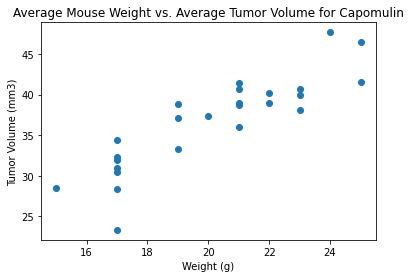

In [107]:
mouse_weight = mouse_weight_cap["Weight (g)"]
tumor_volume = mouse_weight_cap["Tumor Volume (mm3)"]
plt.scatter(mouse_weight, tumor_volume)
plt.title("Average Mouse Weight vs. Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

Text(0, 0.5, 'Tumor Volume (mm3)')

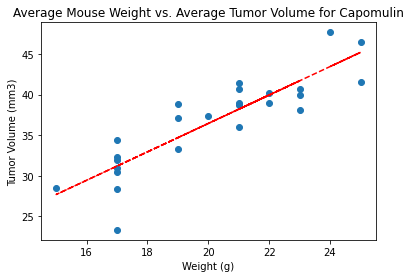

In [109]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

slope, int, r, p, std_err = st.linregress(mouse_weight, tumor_volume)
fit = slope * mouse_weight + int
plt.scatter(mouse_weight, tumor_volume)
plt.plot(mouse_weight, fit, "--", color="r")
plt.title("Average Mouse Weight vs. Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")